In [1]:
# Build the Image classification model by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model's architecture
# c. Training the model
# d. Estimating the model's performance
# IMPORTING REQUIRED PACKAGES ->
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
 




In [2]:
#a> LOADING AND PRE-PROCESSING THE IMAGE DATA
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test)= mnist.load_data()# Splitting into training and testing data
input_shape = (28, 28, 1)

In [3]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [4]:

#print("Data Type of x_train:", x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#print("Data type after converting to float:", x_train.dtype)

In [6]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train / 255
x_test = x_test / 255
print("Shape of Training : ",x_train. shape)
print("Shape of Testing: ",x_test.shape)

Shape of Training :  (60000, 28, 28, 1)
Shape of Testing:  (10000, 28, 28, 1)


In [9]:
# DEFINING THE MODEL's ARCHITECTURE ->
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense (200, activation = "relu"))
model.add(Dropout (0.3))
model.add(Dense (10, activation ="softmax")) 
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [10]:
# c) TRAINING THE MODEL ->
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
model.fit(x_train, y_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2107 - accuracy: 0.9359
Epoch 2/2
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0891 - accuracy: 0.9729


In [12]:
# d) ESTIMATING THE MODEL'S PERFORMANCE ->
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0599 - accuracy: 0.9812
Loss = 0.060
Accuracy=0.981


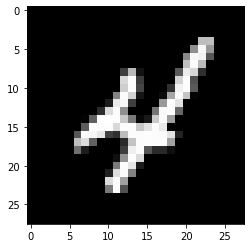

In [16]:
# Showing image at position[] from dataset:
image = x_train[9]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [17]:
# Predicting the class of image:
image=image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Pedicted class: {}".format(np.argmax(predict_model)))

Pedicted class: 4
